# FINAL PROJECT 1 KAMPUS MERDEKA - KELOMPOK 4
NAMA KELOMPOK :
- ALFENDO RIZKY SYACHPUTRA
- SAVITRI DYAH AYU PITALOKA
- SYAIMA RADESTYA

## 1. Perkenalan (Overview)
***
#### **Latar Belakang**
Jika kita berbicara tentang perkembangan teknologi, tentunya tidak akan bisa dipisahkan dari kehidupan manusia. Salah satunya adalah perkembangan pada teknologi transportasi yang memudahkan manusia dalam melakukan perpindahan dari satu tempat ke tempat lainnya. Contoh yang sudah ada pada zaman sekarang adalah taksi online yang dapat dipesan melalui jaringan internet, sehingga customer dapat memesan taksi dengan jenis yang diinginkan secara mudah dan praktis karena tidak perlu lagi menunggu di pinggir jalan untuk mendapatkan taksi.

Namun karena tingginya permintaan sarana transportasi berbasis online, yang salah satunya adalah taksi online, maka hal tersebut berdampak pada banyak perusahaan yang berlomba-lomba untuk dapat memberikan pelayanan terbaik. Dengan adanya data yang berisi informasi mengenai record transaksi perjalanan menggunakan taksi online, maka dapat dengan mudah dilakukan prediksi seperti tarif taksi yang paling sesuai dengan mengimplementasikan analisa prediction menggunakan algoritma Linear Regression.

#### **Dataset**
Dataset yang digunakan pada project ini yaitu Uber and Lyft Dataset Boston, MA yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

Dataset ini berisi data atau histori pemesanan taksi online yang dilengkapi dengan 57 atribut dan memiliki 693071 rows. Karena dataset ini memiliki dimensi yang besar, maka sebelum melakukan proses modeling menggunakan algoritma linear regression, harus dilakukan pemilihan fitur yang tepat.

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam project ini yaitu memahami konsep regresi linear yang digunakan untuk mengestimasi atau memprediksi hubungan antara dua variabel, sehingga dapat mengimplementasikan dalam membuat prediksi tarif harga taksi berdasarkan faktor signifikan yang mempengaruhinya serta mengetahui faktor apa saja yang dianggap penting dalam memprediksi tarif harga Taksi Online.

## 2. Import Library yang Dibutuhkan
***

In [1]:
# import pustaka yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import _strptime
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from scipy import stats
import pickle

## 3. Data Loading
***
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [2]:
# Loading data dengan pandas
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
# Setting untuk menampilkan semua column
pd.set_option("display.max_columns", None)

In [4]:
# Melihat dimensi dataset
df.shape

(693071, 57)

In [5]:
# Menampilkan 5 baris teratas dataset
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
# Menampilkan 5 baris terbawah dataset
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [7]:
# Menampilkan informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
# Menampilkan daftar kolom (atribut)
atribut = df.columns.values
print(atribut)

['id' 'timestamp' 'hour' 'day' 'month' 'datetime' 'timezone' 'source'
 'destination' 'cab_type' 'product_id' 'name' 'price' 'distance'
 'surge_multiplier' 'latitude' 'longitude' 'temperature'
 'apparentTemperature' 'short_summary' 'long_summary' 'precipIntensity'
 'precipProbability' 'humidity' 'windSpeed' 'windGust' 'windGustTime'
 'visibility' 'temperatureHigh' 'temperatureHighTime' 'temperatureLow'
 'temperatureLowTime' 'apparentTemperatureHigh'
 'apparentTemperatureHighTime' 'apparentTemperatureLow'
 'apparentTemperatureLowTime' 'icon' 'dewPoint' 'pressure' 'windBearing'
 'cloudCover' 'uvIndex' 'visibility.1' 'ozone' 'sunriseTime' 'sunsetTime'
 'moonPhase' 'precipIntensityMax' 'uvIndexTime' 'temperatureMin'
 'temperatureMinTime' 'temperatureMax' 'temperatureMaxTime'
 'apparentTemperatureMin' 'apparentTemperatureMinTime'
 'apparentTemperatureMax' 'apparentTemperatureMaxTime']


In [9]:
# Cek apakah ada missing value pada dataset
df.isnull().values.any()

True

In [10]:
# Melihat statistik deskriptif dari data yang bertipe numerik
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [11]:
# Melihat statistik deskriptif dari masing-masing atribut yang bertipe object
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [12]:
# Melihat banyaknya unique values pada masing-masing atribut
for col in df.columns :
    print(col, ':', df[col].nunique())

id : 693071
timestamp : 36179
hour : 24
day : 17
month : 2
datetime : 31350
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
price : 147
distance : 549
surge_multiplier : 7
latitude : 11
longitude : 12
temperature : 308
apparentTemperature : 319
short_summary : 9
long_summary : 11
precipIntensity : 63
precipProbability : 29
humidity : 51
windSpeed : 291
windGust : 286
windGustTime : 25
visibility : 227
temperatureHigh : 129
temperatureHighTime : 23
temperatureLow : 133
temperatureLowTime : 31
apparentTemperatureHigh : 124
apparentTemperatureHighTime : 27
apparentTemperatureLow : 136
apparentTemperatureLowTime : 32
icon : 7
dewPoint : 313
pressure : 316
windBearing : 195
cloudCover : 83
uvIndex : 3
visibility.1 : 227
ozone : 274
sunriseTime : 110
sunsetTime : 114
moonPhase : 18
precipIntensityMax : 65
uvIndexTime : 20
temperatureMin : 131
temperatureMinTime : 25
temperatureMax : 128
temperatureMaxTime : 23
apparentTemperatureMin : 137
apparentTemperatureM

In [13]:
# Menampilkan unique values pada kolom cab_type
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [14]:
# Menampilkan unique values pada kolom name
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

## 4. Data Cleaning
***
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

##### Cek duplikat pada datset

In [15]:
df.duplicated().sum()

0

##### Melihat apakah terdapat missing values pada tiap kolom

In [16]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

##### Menampilkan berapa persen missing value pada kolom price

In [17]:
a = df['price'].isnull().sum()
b = df.shape[0]
print('Jumlah missing value pada kolom price adalah : {0} ({1:2.2f}%)'.format(a, (a/b)*100))

Jumlah missing value pada kolom price adalah : 55095 (7.95%)


##### Menghapus missing values pada kolom

In [18]:
df = df.drop(df[df['price'].isnull()].index)

In [19]:
df.shape

(637976, 57)

In [20]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

##### Menghapus kolom yang tidak diperlukan
Hapus fitur yang tidak memiliki dependency terhadap predictand (price)

In [21]:
df = df.drop(['id','timestamp','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
             'windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
             'apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'],
            axis=1)
print(df.shape)
df.head()

(637976, 41)


,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,1544968800,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,1543251600,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,1543320000,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,1543510800,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,1543420800,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [22]:
# cek korelasi antara fitur price dan fitur yang memiliki relasi dengan temperature
new_df = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
new_df.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<AxesSubplot:>

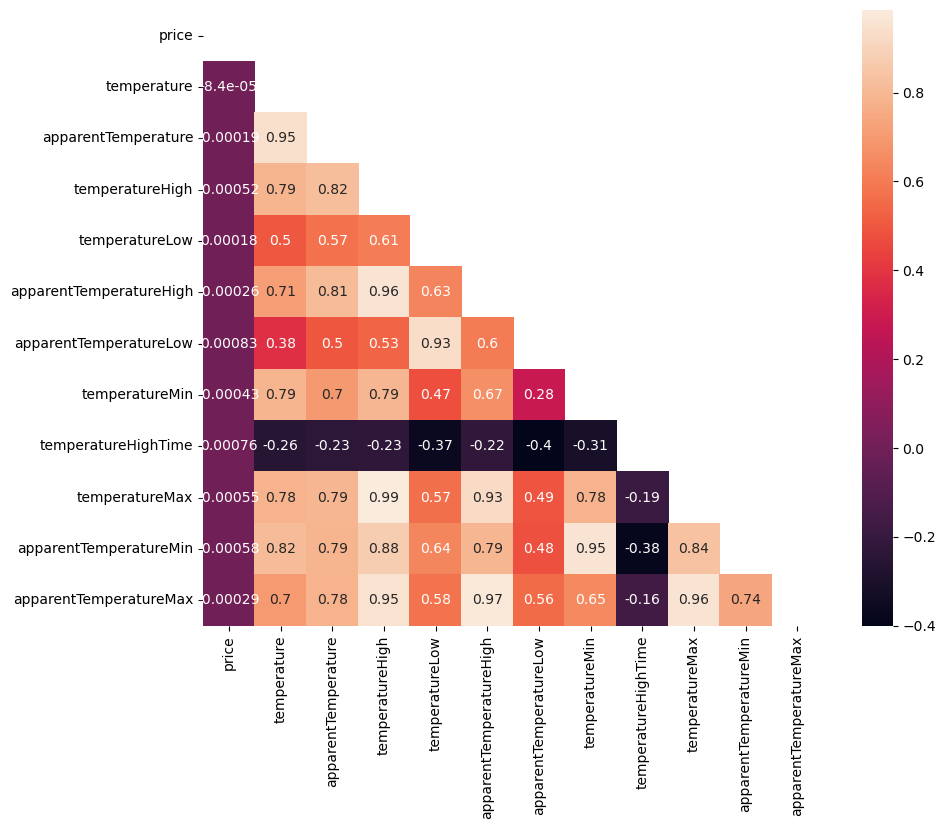

In [23]:
# gunakan heatmap plot dengan korelasi untuk melihat rate korelasi pada dataframe baru
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, mask=np.triu(new_df.corr()))

Hapus semua fitur yang berhubungan dengan temperatur dari dataframe karena mereka memiliki korelasi yang lemah terhadap predictand (price)

In [24]:
new_df = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df = df.drop(new_df.columns, axis=1)
print(df.shape)
df.head()

(637976, 30)


,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [25]:
# eksplorasi dan analisis data pada fitur dengan tipe categorical
kategori_col = df.select_dtypes(include=['object','category']).columns.tolist()
new_data = df[kategori_col]
new_data.head()

,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [26]:
# cek nilai unik pada setiap kolom yang bertipe categorical
for col in new_data:
    print(f"{col} :{new_data[col].unique()}")
    print("="*75)

datetime :['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']
timezone :['America/New_York']
source :['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
destination :['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
cab_type :['Lyft' 'Uber']
product_id :['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']
name :['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL

In [27]:
new_data['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Hapus product_id karena sebagian besar data hanya berisi data sampah dan hapus kolom timezone karena hanya memiliki satu nilai atau jenis

In [28]:
df = df.drop(['timezone','product_id'], axis=1)
df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [29]:
#analisis kolom/fitur yang memiliki tipe numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
new_data2 = df[num_col]
new_data2.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

In [30]:
#analisis dan cek tingkat korelasi antara fitur yang berhubungan dengan cuaca dan price
cuaca_cols = ['price','precipIntensity','precipProbability', 'humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
new_data2 = df[cuaca_cols]
new_data2.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<AxesSubplot:>

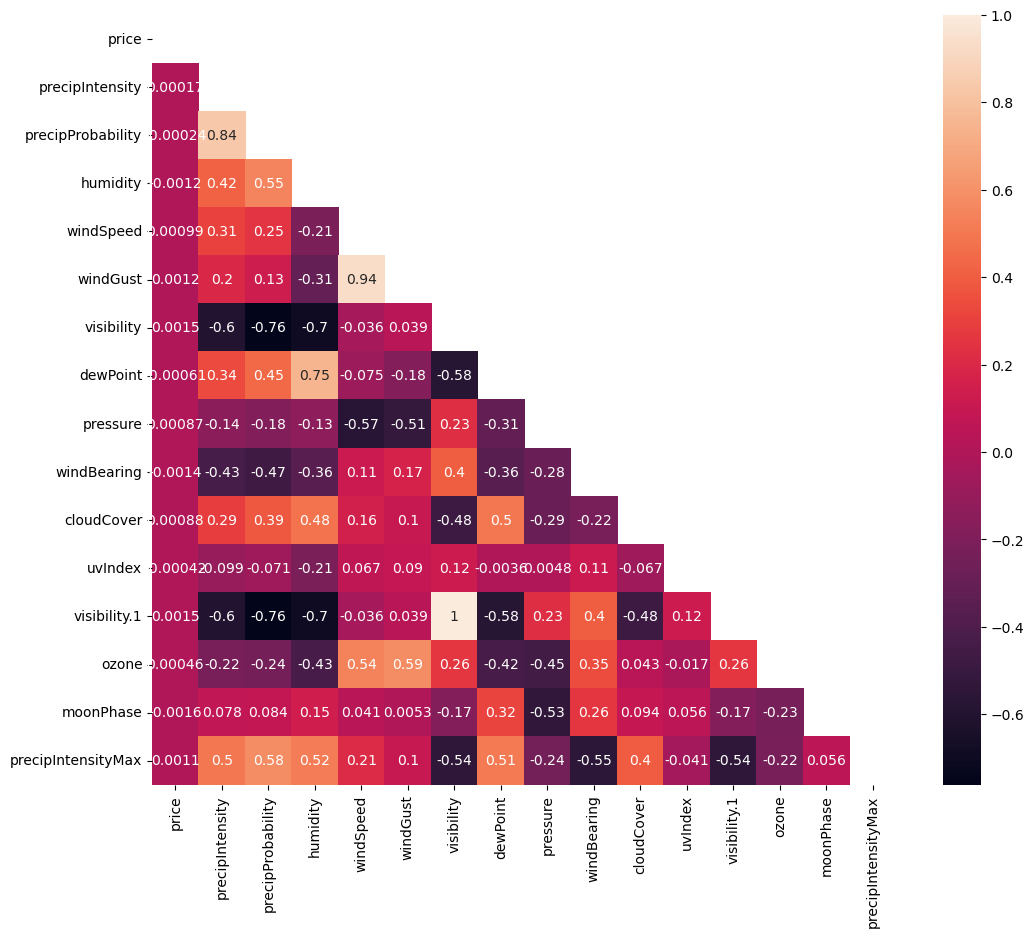

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(new_data2.corr(), annot=True, mask=np.triu(new_data2.corr()))

Semua fitur yang berhubungan dengan cuaca memiliki korelasi yang rendah terhadap kolom price sehingga kami akan drop kolom kolom tersebut

In [32]:
# Hapus kolom icon juga karena sudah ada short_summary
cuaca_cols = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure', 'icon', 'windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
df = df.drop(cuaca_cols, axis=1)
print(df.shape)
df.head()

(637976, 12)


,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


##### Melakukan rename kolom dari datasets

In [33]:
df = df.rename(
    columns={ 'cab_type':'taxi_type',
             'name':'merk',
             'short_summary':'weather'
             })
df.head()

,hour,day,month,datetime,source,destination,taxi_type,merk,price,distance,surge_multiplier,weather
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


##### Mengekstrak hari dari atribut datetime 

In [34]:
df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df['day_of_week'] = df['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

##### Menghapus kolom datetime karena dapat diwakilkan oleh atribut hour, day, month dan day_of_week

In [35]:
df = df.drop(["datetime"], axis=1)

##### Melihat banyaknya nilai dari masing-masing atribut

In [36]:
for col in df.columns :
    print(col, ': ')
    print(df[col].value_counts())
    print('\n', '='*70, '\n')

hour : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: hour, dtype: int64


day : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64


month : 
12    374205
11    263771
Name: month, dtype: int64


source : 
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
Nort

##### Membuat kolom atau atribut baru
disini kami membuat atribut atau kolom baru yaitu **CPM** (Cost Per Mile), yang didapatkan dengan menghitung **Harga** dibagi dengan **Jarak**

In [37]:
df['cost_per_mile'] = df['price'] / df['distance']
df.head()

,hour,day,month,source,destination,taxi_type,merk,price,distance,surge_multiplier,weather,day_of_week,cost_per_mile
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,Sunday,11.363636
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,Tuesday,25.000000
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,Wednesday,15.909091
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,Friday,59.090909
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,Thursday,20.454545


#### ANALISIS
Dari hasil pengecekan, dapat diketahui bahwa nilai missing value hanya terdapat pada kolom **price**. Kami menghapus semua record kolom price yang memiliki nilai null. Dan pada bagian ini, kami menghapus bagian kolom yang tidak diperlukan juga untuk dilakukan prediksi serta membuat kolom atau atribut baru yaitu `CPM` (Cost Per Mile), yang didapatkan dengan menghitung `Harga` dibagi dengan `Jarak`

## 5. Explorasi Data
***
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

##### Menampilkan bagian data pada kolom Tipe_Taksi dan Merek dengan menggunakan crosstab

In [38]:
pd.crosstab(df.taxi_type, df.merk)

merk,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
taxi_type,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55091,55094,55096,55096


**Kesimpulan :** <br>
Dari hasil diatas maka dapat diketahui bahwa <br>
- Tipe atau jenis taksi **Lyft** memiliki 6 merek, yaitu : <br>
*Lux, Lux Black, Lux Black XL, Lyft, Lyft XL, Shared* <br> 
- Tipe atau jenis taksi **Uber** memiliki 7 merek, yaitu : <br>
*Black, Black SUV, Taxi, UberPool, UberX, UberXL, WAV*

##### Menampilkan price termurah dan termahal pada tipe taksi Uber & Lyft

In [39]:
# Harga Tipe Taksi Uber
df.loc[df['taxi_type'] == 'Uber', 'price'].agg(('min', 'max'))

min     4.5
max    89.5
Name: price, dtype: float64

In [40]:
# Harga Tipe Taksi Lyft
df.loc[df['taxi_type'] == 'Lyft', 'price'].agg(('min', 'max'))

min     2.5
max    97.5
Name: price, dtype: float64

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa untuk **tipe taksi Uber** mendapat harga termurah yaitu 4.5 dollar dan harga termahal 89.5 dollar selama menerima penumpang. Sedangkan untuk **tipe taksi Lyft** mendapat harga termurah yaitu 2.5 dollar dan harga termahal 97.5 dollar selama menerima penumpang

##### Menampilkan rata-rata jarak untuk masing-masing merek dengan grouping

In [41]:
mean_jarak = df[['merk', 'distance']].groupby('merk').mean().sort_values(by='merk', ascending=False)
mean_jarak

,distance
merk,
WAV,2.191378
UberXL,2.191378
UberX,2.191390
UberPool,2.191396
Shared,2.187012
Lyft XL,2.186968
Lyft,2.186968
Lux Black XL,2.186968
Lux Black,2.186968


**Kesimpulan :** Dari hasil dapat dilihat bahwa untuk rata-rata jarak terjauh diperoleh taksi dengan merek Black dengan nilai 2.191399 sedangkan rata-rata jarak terdekat diperoleh taksi dengan merek Lux, Lux Black, Lux Black XL, Lyft dan Lyft XL dengan nilai yang sama yaitu 2.186968

##### Menampilkan histori top 5 record pemesanan merek taksi UberPool pada bulan Desember dengan tujuan Boston University dengan melakukan query

In [42]:
df[
    (df['merk'] == 'UberPool') &
    (df['month'] == 12) &
    (df['destination'] == 'Boston University')
].head()

,hour,day,month,source,destination,taxi_type,merk,price,distance,surge_multiplier,weather,day_of_week,cost_per_mile
261,2,10,12,Back Bay,Boston University,Uber,UberPool,6.5,1.40,1.0,Clear,Monday,4.642857
440,2,3,12,West End,Boston University,Uber,UberPool,11.0,2.80,1.0,Overcast,Monday,3.928571
916,6,13,12,Back Bay,Boston University,Uber,UberPool,7.0,1.41,1.0,Clear,Thursday,4.964539
1568,4,15,12,Back Bay,Boston University,Uber,UberPool,7.0,1.41,1.0,Overcast,Saturday,4.964539
1937,21,17,12,Back Bay,Boston University,Uber,UberPool,8.0,1.41,1.0,Mostly Cloudy,Monday,5.673759


### Visualisasi Bar Chart Rata-Rata Tarif Taksi Pada Setiap Merek

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


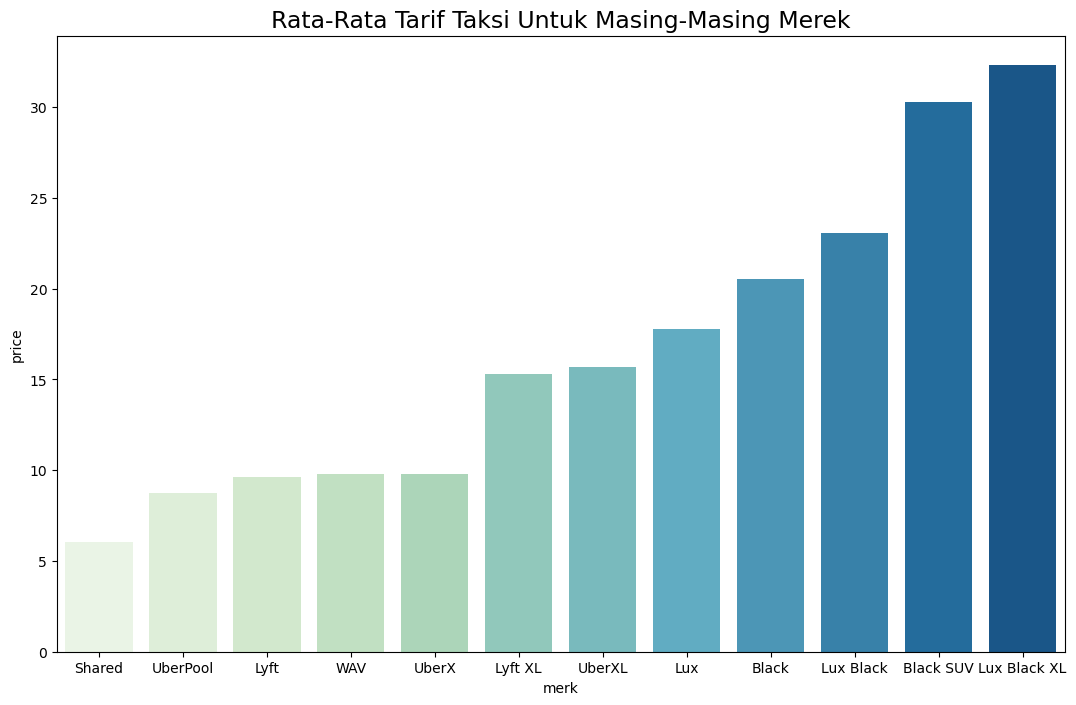

In [43]:
price = df[['merk','price']].groupby('merk').mean()
plt.figure(figsize = (13,8))
sns.barplot(price.index, price["price"], palette = "GnBu",
            order = price["price"].sort_values().index)
plt.title("Rata-Rata Tarif Taksi Untuk Masing-Masing Merek", fontsize=17)
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk rata-rata harga paling tinggi diperoleh taksi dengan merek **Lux Black XL** sedangkan rata-rata harga paling rendah diperoleh taksi dengan merek **Shared**

### Visualisasi Pie Chart dan Histogram Bagian Data Tipe Taksi

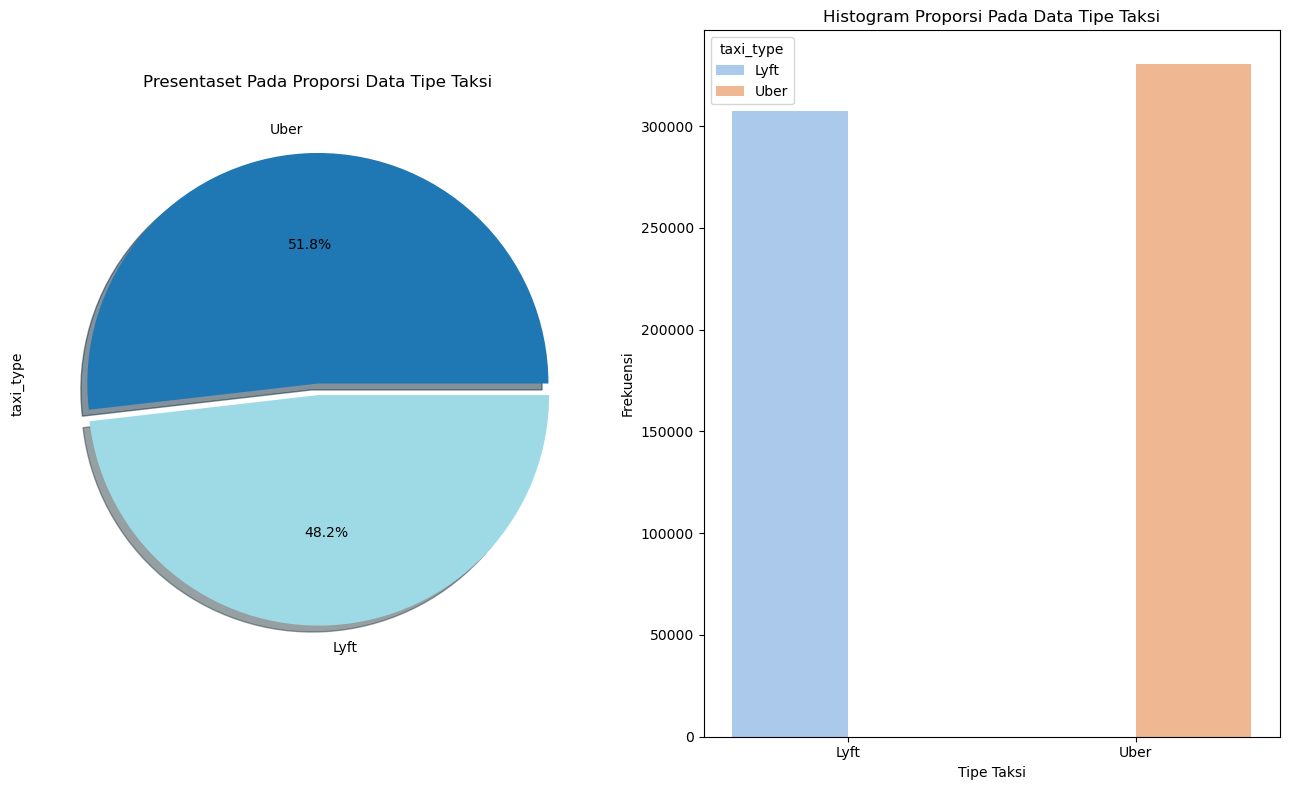

In [44]:
fig,ax = plt.subplots(1,2, figsize=(13,8))

# Pie Chart
df['taxi_type'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05],
    cmap='tab20',
    shadow=True
)
ax[0].set_title('Presentaset Pada Proporsi Data Tipe Taksi')

# Histogram
sns.countplot(
    x='taxi_type',
    hue='taxi_type',
    data=df, 
    palette = "pastel"
)
ax[1].set_title('Histogram Proporsi Pada Data Tipe Taksi')
ax[1].set_ylabel('Frekuensi')
ax[1].set_xlabel('Tipe Taksi')
fig.tight_layout()

**Kesimpulan :** Dari hasil visualisasi pie chart dan histogram diatas maka dapat dilihat bahwa proporsi data Tipe Taksi Lyft memiliki presentase senilai **44.4%** sedangkan Tipe Taksi Uber memiliki presentase senilai **55.6%**. Maka dapat disimpulkan bahwa proporsi data antara jenis atau Tipe Taksi Lyft lebih sedikit daripada Jenis Taksi Uber.

### Visualisasi Box Plot Perbandingan Tipe Taksi Berdasarkan Jarak

Text(0.5, 1.0, 'Box Plot Perbandingan Tipe Taksi Berdasarkan Jarak')

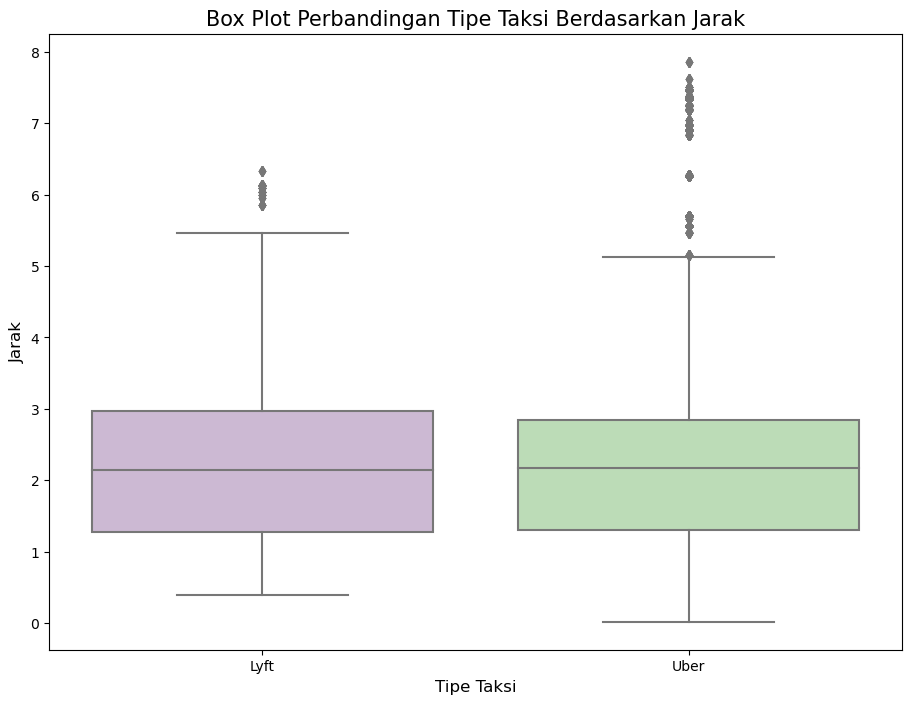

In [45]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(x='taxi_type', y='distance', data=df, palette="PRGn")

plt.xlabel("Tipe Taksi", fontsize= 12)
plt.ylabel("Jarak", fontsize= 12)
plt.title("Box Plot Perbandingan Tipe Taksi Berdasarkan Jarak", fontsize= 15)

**Kesimpulan :** Dari hasil visualisasi box plot diatas maka dapat dilihat bahwa Uber memiliki jangkauan jarak yang cukup jauh dengan Lyft serta outlier Tipe Taksi Uber juga lebih banyak daripada Tipe Taksi Lyft.

### Visualisasi Korelasi Antar Variabel Untuk Melihat Hubungan

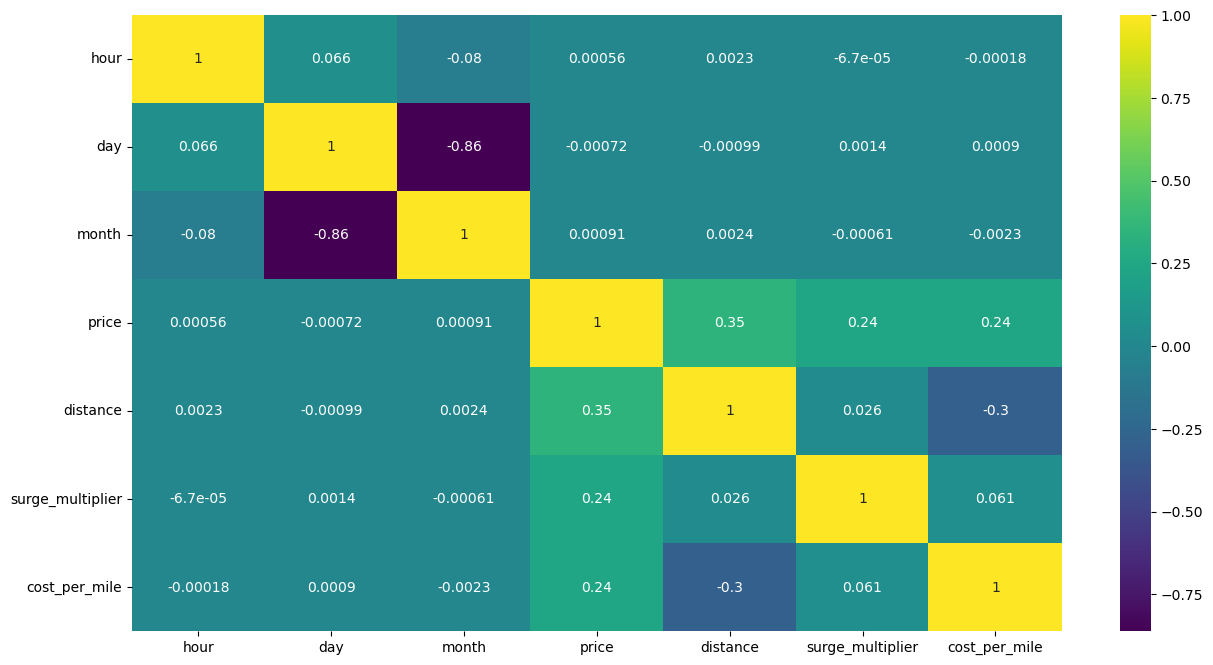

In [46]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

**Kesimpulan :** <br>
Dari hasil visualisasi matrix korelasi, maka dapat disimpulkan : <br>
- Harga dan Jarak memiliki korelasi yang cukup tinggi yaitu dengan nilai 0.35
- Harga dan surge_multiplier memiliki korelasi yang cukup tinggi ke-2 yaitu dengan nilai 0.24
- Hari dan Bulan memiliki korelasi yang paling rendah yaitu dengan nilai -0.86

## 6. Data Preprocessing
***
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

##### a. Melakukan inisialisasi variabel X dan y
Di sesi ini kami mendefinisikan untuk variabel X nya yaitu kolom selain Harga, CPM dan Tanggal, sedangkan untuk variabel y yaitu Harga

In [47]:
X = df.drop(['price', 'cost_per_mile'], axis=1)
y = df['price']

print(X.shape)
print(y.shape)

(637976, 11)
(637976,)


##### b. Melakukan encoding pada float dan categorical columns
Untuk kolom kategorik yaitu `Tanggal`, `Asal`, `Tujuan`, `Tipe_Taksi`, `Merek`, `Cuaca`, `Jarak`, dan `surge_multiplier`

In [48]:
encode = LabelEncoder()

df['source'] = encode.fit_transform(df['source'])
df['destination'] = encode.fit_transform(df['destination'])
df['taxi_type'] = encode.fit_transform(df['taxi_type'])
df['merk'] = encode.fit_transform(df['merk'])
df['weather'] = encode.fit_transform(df['weather'])
df['surge_multiplier'] = encode.fit_transform(df['surge_multiplier'])
df['distance'] = encode.fit_transform(df['distance'])
df['day_of_week'] = encode.fit_transform(df['day_of_week'])

# Melihat 5 baris teratas dataset yang telah dilakukan encoding
df.head()

,hour,day,month,source,destination,taxi_type,merk,price,distance,surge_multiplier,weather,day_of_week,cost_per_mile
0,9,16,12,5,7,0,7,5.0,15,0,4,3,11.363636
1,2,27,11,5,7,0,2,11.0,15,0,8,5,25.000000
2,1,28,11,5,7,0,5,7.0,15,0,0,6,15.909091
3,4,30,11,5,7,0,4,26.0,15,0,0,0,59.090909
4,3,29,11,5,7,0,6,9.0,15,0,6,4,20.454545


In [49]:
X = df.drop(['price', 'cost_per_mile'], axis=1)
y = df['price']

print(X.shape)
print(y.shape)

(637976, 11)
(637976,)


##### c. Melakukan Feature Selection

In [50]:
linreg = LinearRegression()
sfs = SequentialFeatureSelector(linreg, n_features_to_select=3, scoring='r2', cv = 3)

In [51]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(),
                          n_features_to_select=3, scoring='r2')

In [52]:
print(sfs.get_support())
print(sfs.transform(X).shape)

[False False False False False False  True  True  True False False]
(637976, 3)


In [53]:
sfs._check_feature_names

<bound method BaseEstimator._check_feature_names of SequentialFeatureSelector(cv=3, estimator=LinearRegression(),
                          n_features_to_select=3, scoring='r2')>

In [54]:
data = pd.read_csv("rideshare_kaggle.csv")
X = df.drop(['price', 'cost_per_mile'], axis=1)  #independent columns
y = df['price']   #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs          Score
6               merk  334771.122826
7           distance   86947.585772
8   surge_multiplier   39654.540356
5          taxi_type    4466.959446
4        destination    1371.722040
3             source     410.760893
10       day_of_week       5.225958
9            weather       0.988454
2              month       0.532334
1                day       0.332745


##### d. Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk dilakukan pemodelan selanjutnya

In [55]:
X_fit = df[['merk', 'distance', 'surge_multiplier', 'taxi_type', 'destination', 'source',
            'day_of_week']]

In [56]:
X_fit.head()

,merk,distance,surge_multiplier,taxi_type,destination,source,day_of_week
0,7,15,0,0,7,5,3
1,2,15,0,0,7,5,5
2,5,15,0,0,7,5,6
3,4,15,0,0,7,5,0
4,6,15,0,0,7,5,4


In [57]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   merk              637976 non-null  int32
 1   distance          637976 non-null  int64
 2   surge_multiplier  637976 non-null  int64
 3   taxi_type         637976 non-null  int32
 4   destination       637976 non-null  int32
 5   source            637976 non-null  int32
 6   day_of_week       637976 non-null  int32
dtypes: int32(5), int64(2)
memory usage: 26.8 MB


In [58]:
X_fit.shape

(637976, 7)

#### e. Membagi proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=46)

In [60]:
print(X_train.shape)
print(X_test.shape)

(510380, 7)
(127596, 7)


## 7. Pendefinisian Model
***
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

Metode pengujian pada training ini menggunakan metode Linear Regression dengan pembanding Random Forest Regressor. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kontinu, sehingga metode tersebut cocok digunakan.

a. Model Linear Regression dengan melakukan normalisasi data dengan mean menggunakan Standard Scaler. Hal ini kami lakukan karena kolom yang digunakan untuk prediksi memiliki variasi pada data satuan.

In [61]:
model = make_pipeline(StandardScaler(), LinearRegression())

b. Model kedua yakni model Random Forest Regressor. Model ini digunakan sebagai pembanding dari model Linear Regression. Parameter yang digunakan yakni n estimator sejumlah 50, dikarenakan dataset ini memiliki baris yang sangat banyak sehingga cabang tree yang digunakan dapat diperkecil.

In [62]:
regr = RandomForestRegressor(n_estimators = 50, random_state = 46)

## 8. Pelatihan Model
***
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [63]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [64]:
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=46)

## 9. Evaluasi Model
***
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model.

### LINEAR REGRESSION MODEL 

Linear Regression train R squared: 0.5156
Linear Regression test R squared: 0.5131
Linear Regression test RMSE: 6.4972


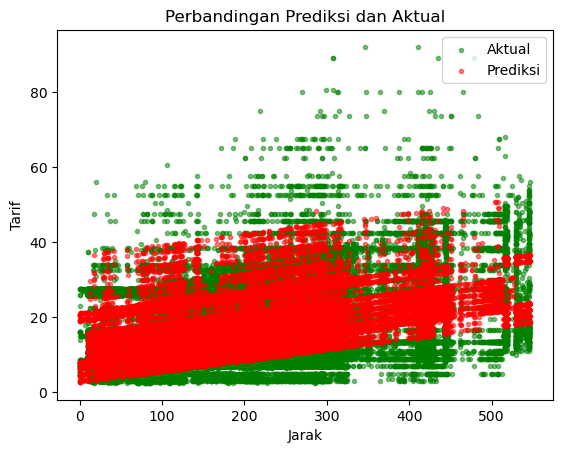

In [65]:
y_pred = model.predict(X_test)
model_train_r2 = model.score(X_train, y_train)
model_test_r2 = model.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % model_train_r2)
print('Linear Regression test R squared: %.4f' % model_test_r2)

model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Linear Regression test RMSE: %.4f' % model_rmse)

x_axis = X_test.distance

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')
plt.show()

**Kesimpulan :** Dari hasil didapatkan dengan menggunakan model 1, maka dapat diketahui bahwa hasil score Linear Regression test R squared adalah 0.2746. nilai yang didapatkan ini cukup kecil sehingga kemungkinan hasil prediksi nantinya tidak akurat.

### RANDOM FOREST REGRESSOR
Pada bagian ini, kami membuat model baru menggunakan *random forest regressor* untuk peningkatan hasil score akurasi

Random Forest train R squared is: 0.9762
Random Forest test R squared is: 0.9659
Random Forest RMSE: 1.7199


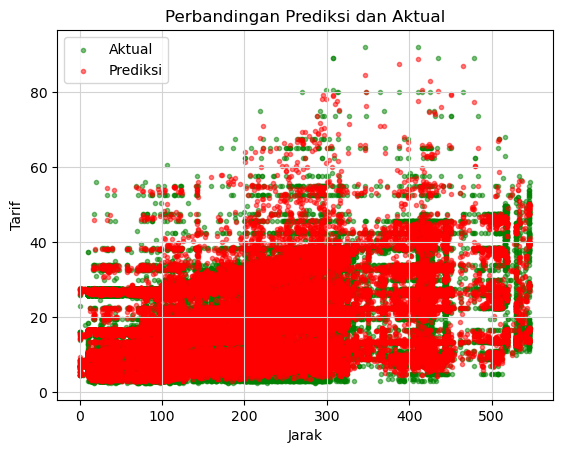

In [66]:
predictions = regr.predict(X_test)
l_rf_train_r2 = regr.score(X_train,y_train)
l_rf_test_r2 = regr.score(X_test, y_test)
print('Random Forest train R squared is: %.4f' % l_rf_train_r2)
print('Random Forest test R squared is: %.4f' % l_rf_test_r2)

l_forest_mse = mean_squared_error(predictions, y_test)
l_forest_rmse = np.sqrt(l_forest_mse)
print('Random Forest RMSE: %.4f' % l_forest_rmse)

x_axis = X_test.distance

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'upper left')
plt.show()

**Kesimpulan :** Dari hasil dengan mengganti model menggunakan Random Forest Regressor, maka didapatkan hasil score dari Random Forest test R squared adalah 0.9659. Nilai yang didapatkan ini tentunya dapat dibilang baik karena nilai atau score yang dihasilkan cukup tinggi.

## 10. Model Inference
***
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [67]:
df_new = {'merk':[1,2,3,4,5], 'distance':[5,3,7,2,9], 'surge_multiplier':[1,1,2,2.5,3.5], 'taxi_type':[1,2,3,4,5], 'destination':[8,8,8,9,9], 
         'source':[6,6,7,7,7],'day_of_week':[1,2,3,4,5]}
df_new = pd.DataFrame(df_new)
df_new

,merk,distance,surge_multiplier,taxi_type,destination,source,day_of_week
0,1,5,1.0,1,8,6,1
1,2,3,1.0,2,8,6,2
2,3,7,2.0,3,8,7,3
3,4,2,2.5,4,9,7,4
4,5,9,3.5,5,9,7,5


In [68]:
y_pred_new = model.predict(df_new)
print('Prediksi Tarif yaitu: ')
print(y_pred_new)

Prediksi Tarif yaitu: 
[24.70107359 25.38430022 31.49225759 34.7164728  40.87870294]


**Kesimpulan :** Model yang telah digunakan selanjutnya dilakukan pengujian dengan data yang lain dan menujukkan bahwa model bisa digunakan dengan membuat data baru.

## 11. Pengambilan Kesimpulan
***
Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
- Pada dataset terdapat dimensi yang tinggi yaitu 693071 baris dan 57 kolom. Dengan begitu banyaknya fitur, maka perlu diketahui fitur mana saja yang memiliki korelasi yang cukup, dan akhirnya setelah dilakukan cleaning data maka hasil dimensi pada dataset ini yaitu 637976 baris dan 13 kolom.
- Pada project ini kami juga membuat beberapa visualisasi menggunakan barchart, pie chart, histogram, boxplot dan matriks korelasi.
- Pada project ini variabel dependen atau target yang digunakan yaitu Harga, untuk variabel independen yang digunakan yaitu *source, destination, taxi_type, merk, distance, dan surge_multiplier*.
- Pada analisis kami mengubah data yang bertipe float dan categorical menjadi tipe numeric dengan mengunakan library Label Encoder.
- Pada project ini kami membagi data menjadi Training dan Testing dengan proporsi Training data yaitu sebesar 80% (0.80) dan Testing data sebesar 20% (0.20).
-  Untuk membuat model prediksi, pada projek ini menggunakan algoritma Linear Regression yaitu dimana nilai dilakukan normalisasi data dengan mean (rata-rata) menggunakan standard scaler. Alasan dilakukannya normalisasi karena atribut atau kolom yang digunakan untuk prediksi memiliki variasi pada data satuan, sehingga hal itu dapat diatasi dengan melakukan normalisasi data. Dengan model ini didapatkan R2 score senilai **0.5131 (51%)** pada model *Linear Regression*.
- Di project ini kami juga melakukan peningkatan akurasi pada model awal dikarenakan hasil score pada model *Linear Regression* begitu rendah. Kami melakukan peningkatan akurasi menggunakan metode *Random Forest Regressor* yang didapatkan hasil akurasi **0.9697 (97%)**.
- Hasil dari model inference menunjukkan bahwa modeling yang digunakan bisa untuk data yang lain.

